In [1]:
# Setup the library
import pyrogue as pr
import os, sys
import matplotlib.pyplot as plt
import time
import numpy as np
import math

top_level=f'{os.getcwd()}/../../../'
pr.addLibraryPath( f'{top_level}/scripts' )
import setupLibPaths
import epix_hr_single_10k

In [2]:
# Create and start the root class
root = epix_hr_single_10k.Root(
    top_level   = top_level,
    sim         = False,
    dev         = '/dev/datadev_1',
    asicVersion = 4,
    pollEn      = False
)
root.start()

Simulation mode : False
justCtrl mode : False
Start: Started zmqServer on ports 9103-9105
    To start a gui: python -m pyrogue gui --server='localhost:9103'
    To use a virtual client: client = pyrogue.interfaces.VirtualClient(addr='localhost', port=9103)


In [3]:
root.Core.AxiVersion.FpgaReload()
time.sleep(5)

In [4]:
# Create useful pointers
AxiVersion = root.Core.AxiVersion
print ( '###################################################')
print ( '#             Firmware Version                    #')
print ( '###################################################')
AxiVersion.printStatus()
print ( '###################################################')

###################################################
#             Firmware Version                    #
###################################################
Path         = ePixHr10kT.Core.AxiVersion
FwVersion    = 0x3010000
UpTime       = 0:00:02
GitHash      = dirty (uncommitted code)
XilinxDnaId  = 0x40020001016011410501c185
FwTarget     = EpixHr10kTLclsIITiming
BuildEnv     = Vivado v2023.1
BuildServer  = rdsrv408 (CentOS Linux 7 (Core))
BuildDate    = Fri Nov 22 07:35:07 PST 2024
Builder      = ddoering
###################################################


In [5]:
#Initialze the camera
#[routine, asic0, asic1, asic2, asic3]'
root.EpixHR.InitASIC([21,1,1,1,1])
root.EpixHR.PacketRegisters0.asicDataReq.set(145)
root.EpixHR.PacketRegisters1.asicDataReq.set(145)
root.EpixHR.PacketRegisters0.DisableLane.set(0xffe)
root.EpixHR.PacketRegisters0.EnumerateDisLane.set(0xfff)

Rysync ASIC started
Init ASIC script started
Loading MMCM configuration
/u1/ddoering/localGit/epix-hr-single-10k/software/notebooks/ASIC_V4/pre-proc/../../../yml/ePixHr10kT_MMCM_248MHz.yml
Completed
Loading supply configuration
/u1/ddoering/localGit/epix-hr-single-10k/software/notebooks/ASIC_V4/pre-proc/../../..//yml/ePixHr10kT_PowerSupply_Enable.yml
Loading register control (waveforms) configuration
/u1/ddoering/localGit/epix-hr-single-10k/software/notebooks/ASIC_V4/pre-proc/../../..//yml/ePixHr10kT_RegisterControl_24us_248MHz.yml
Loading packet registers
/u1/ddoering/localGit/epix-hr-single-10k/software/notebooks/ASIC_V4/pre-proc/../../..//yml/ePixHr10kT_PacketRegisters.yml
Taking asic off of reset
Loading ASIC and timing configuration
Loading  /u1/ddoering/localGit/epix-hr-single-10k/software/notebooks/ASIC_V4/pre-proc/../../..//yml/ePixHr10kT_PLLBypass_248MHz_ASIC_0.yml
Command executed :  <class 'pyrogue._Command.BaseCommand'> - ePixHr10kT.EpixHR.Hr10kTAsic0.ClearMatrix
Loading  /

In [69]:
root.EpixHR.DataCorrectionHLS.enable.set(True)
#root.dummyGen0.SendCalibFrame()
print(root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.get())
root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.set(0)
print(root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.get())

root.EpixHR.PacketRegisters0.DisableLane.set(0x0)
root.EpixHR.PacketRegisters0.EnumerateDisLane.set(0x0)
root.EpixHR.TriggerRegisters.SetAutoTrigger(10)
root.EpixHR.TriggerRegisters.StartAutoTrigger()
print(root.DataReceiver2.FrameCount.get())
time.sleep(3)
print(root.DataReceiver2.FrameCount.get())
root.EpixHR.TriggerRegisters.StopTriggers()


root.EpixHR.DataCorrectionHLS.enable.set(True)
#root.dummyGen0.SendCalibFrame()
print(root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.get())
root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.set(2)
print(root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.get())


root.EpixHR.PacketRegisters0.DisableLane.set(0xf)
root.EpixHR.PacketRegisters0.EnumerateDisLane.set(0xf)
root.EpixHR.TriggerRegisters.SetAutoTrigger(10)
root.EpixHR.TriggerRegisters.StartAutoTrigger()
print(root.DataReceiver2.FrameCount.get())
time.sleep(3)
print(root.DataReceiver2.FrameCount.get())
root.EpixHR.TriggerRegisters.StopTriggers()

2
0
Set Auto Trigger command executed
Start Auto Trigger command executed
1420
1437
Stop Triggers command executed
0
2
Set Auto Trigger command executed
Start Auto Trigger command executed
1437
1456
Stop Triggers command executed
Start Auto Trigger command executed


In [28]:
root.EpixHR.PacketRegisters0.DisableLane.set(0xfff)
root.EpixHR.PacketRegisters0.EnumerateDisLane.set(0xfff)
root.EpixHR.TriggerRegisters.SetAutoTrigger(10)
root.EpixHR.TriggerRegisters.StartAutoTrigger()
print(root.DataReceiver2.FrameCount.get())
time.sleep(3)
print(root.DataReceiver2.FrameCount.get())
root.EpixHR.TriggerRegisters.StopTriggers()

Set Auto Trigger command executed
Start Auto Trigger command executed
397
414
Stop Triggers command executed


In [29]:
root.EpixHR.BatcherEventBuilder2.Blowoff.get()


False

In [30]:
#use system with batcher and missing ASICs
root.EpixHR.SspLowSpeedDecoderReg.enable.set(True)
print ("Locked lanes: %x" % root.EpixHR.SspLowSpeedDecoderReg.Locked.get())
#Only ASIC 1 is available so disable the 6 lower lanes
#root.EpixHR.PacketRegisters0.DisableLane.set(0x3FF)
#root.EpixHR.PacketRegisters1.DisableLane.set(0xFC0)


Locked lanes: ffffff


In [109]:
imgRows = 145
imgCols = 384
darkHigh = np.ones((imgRows,imgCols),dtype=np.uint64)*0
for i in range(145):
    darkHigh[i, :] = i
#darkHigh[:,  0] = 0
#darkHigh[0, :] = np.arange(384)
#darkHigh[2, :] = np.arange(384)
#darkHigh[2, :] = 0
#darkHigh[20, :] = 0
gainHigh = np.ones((imgRows,imgCols),dtype=np.uint64)*0
darkLow  = np.ones((imgRows,imgCols),dtype=np.uint64)*0
gainLow  = np.ones((imgRows,imgCols),dtype=np.uint64)*0

calibParams = root.dummyGen0.setCalibArray(gainLow,darkLow,gainHigh,darkHigh)
root.dummyGen0.testImage = calibParams

In [80]:
root.dummyGen0._height = 5

In [111]:
root.EpixHR.TriggerRegisters.StopTriggers()
time.sleep(1)
#HLS
root.EpixHR.DataCorrectionHLS.enable.set(True)
#root.dummyGen0.SendCalibFrame()
print(root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.get())
root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.set(1)
print(root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.get())
# sending frame twice enable calib write
#root.dummyGen0.SendCalibFrame()
for i in range(1):
    root.dummyGen0.SendCalibFrame()
    time.sleep(0.05)
time.sleep(5)
#root.dummyGen0.SendCalibFrame()
root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.set(0)
# sending fram after enables raw data in
root.dummyGen0._height = 145
root.dummyGen0.SendCalibFrame()

Stop Triggers command executed
2
1
ibFrame.getPayload() = 445440
ibFrame.getPayload() = 445440
Start Auto Trigger command executed


imgRows = 145
imgCols = 384
darkHigh = np.ones((imgRows,imgCols),dtype=np.uint64)*500
gainHigh = np.ones((imgRows,imgCols),dtype=np.uint64)*256
darkLow  = np.ones((imgRows,imgCols),dtype=np.uint64)*100
gainLow  = np.ones((imgRows,imgCols),dtype=np.uint64)*256

calibParams = root.dummyGen0.setCalibArray(gainLow,darkLow,gainHigh,darkHigh)
root.dummyGen0.testImage = calibParams

#root.EpixHR.TriggerRegisters.StopTriggers()
#time.sleep(1)
#HLS
root.EpixHR.DataCorrectionHLS.enable.set(True)
root.dummyGen0.SendCalibFrame()
print(root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.get())
root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.set(1)
print(root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.get())
# sending frame twice enable calib write
root.dummyGen0.SendCalibFrame()
root.dummyGen0.SendCalibFrame()
root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.set(4)
# sending fram after enables raw data in
root.dummyGen0.SendCalibFrame()

vhex = np.vectorize(hex)
vhex(root.dummyGen0.testImage)

In [ ]:
root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.set(2)
root.EpixHR.TriggerRegisters.SetAutoTrigger(10)
root.EpixHR.TriggerRegisters.StartAutoTrigger()
print(root.DataReceiver2.FrameCount.get())
time.sleep(1)
print(root.DataReceiver2.FrameCount.get())

# 1 - load calib
# 2 - dark sub
# 4 - gain corr
# 6 - dark and gain
root.EpixHR.TriggerRegisters.StopTriggers()
time.sleep(0.1)
root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.set(4)
time.sleep(0.1)
root.EpixHR.TriggerRegisters.StartAutoTrigger()

(144, 384)
(144, 384)
[-262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262
 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262
 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262
 -262 -262 -262 -262 -262 -262 -262 -262 -230 -230 -262 -262 -262 -262
 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262
 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262
 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262
 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262
 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262 -262
 -262 -262 1588 1722 1660 1660 1620 1564 1630 1690 1774 1754 1674 1704
 1624 1622 1646 1680 1716 1712 1648 1684 1712 1642 1708 1644 1646 1664
 1544 1612 1696 1640 1672 1694 1736 1618 1710 1684 1708 1662 1766 1716
 1768 1750 1662 1682 1700 1752 1696 1718 1722 1696 1786 1666 1730 1652
 1756 1714 1770 1820 1694 1686 1728 1766 1798 1732 7488

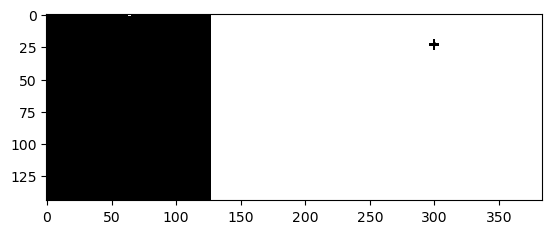

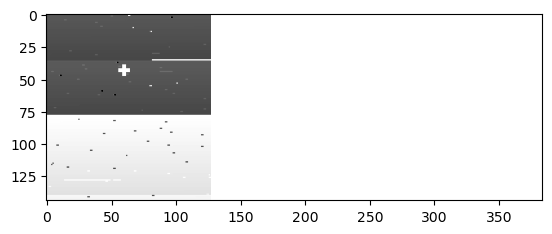

Connected to ePixHr10kT at localhost:9103
ERROR:pydm.data_plugins:Channel  did not specify a valid protocol and no default protocol is defined. This channel will receive no data. To specify a default protocol, set the PYDM_DEFAULT_PROTOCOL environment variable.
ERROR:pydm.data_plugins:Channel  did not specify a valid protocol and no default protocol is defined. This channel will receive no data. To specify a default protocol, set the PYDM_DEFAULT_PROTOCOL environment variable.
ERROR:pydm.data_plugins:Channel  did not specify a valid protocol and no default protocol is defined. This channel will receive no data. To specify a default protocol, set the PYDM_DEFAULT_PROTOCOL environment variable.
Rogue/pyrogue version v6.2.0. https://github.com/slaclab/rogue
ZmqClient::setTimeout: Setting timeout to 1000 msecs, waitRetry = 0
ZmqClient::setTimeout: Setting timeout to 1000 msecs, waitRetry = 1


In [112]:
dark = root.DataReceiver0.Data.get()
print(dark.shape)
plt.figure()
plt.imshow(dark, cmap='gray', vmin=0, vmax=20)
plt.plot()

plt.figure()
pre = root.DataReceiver2.Data.get().astype(np.int16)
print(dark.shape)
dark.shape
plt.imshow(pre, cmap='gray', vmin=-400, vmax=0)
plt.plot()

imgRows = 145
imgCols = 384
darkHigh = np.ones((imgRows,imgCols),dtype=np.uint64)*0
darkHigh[1:,:] = dark
gainHigh = np.ones((imgRows,imgCols),dtype=np.uint64)*0
darkLow  = np.ones((imgRows,imgCols),dtype=np.uint64)*0
darkLow[1:,:] = dark
gainLow  = np.ones((imgRows,imgCols),dtype=np.uint64)*0

#calibParams = root.dummyGen0.setCalibArray(gainLow,darkLow,gainHigh,darkHigh)
#root.dummyGen0.testImage = calibParams

print(pre[1,:])
print(pre[117,:])
print(pre[:,20])

In [ ]:
[row,col] = np.where(pre != 0)
col.shape

In [108]:
root.EpixHR.TriggerRegisters.StopTriggers()
time.sleep(1)
root.EpixHR.RegisterControl.preProcCrtl.set(1)
time.sleep(1)
root.EpixHR.RegisterControl.preProcCrtl.set(0)

Stop Triggers command executed


In [ ]:
imgRows = 145
imgCols = 384
darkHigh = np.ones((imgRows,imgCols),dtype=np.uint64)*0
#darkHigh[0, :] = np.arange(384)
darkHigh[1, :] = 100
#darkHigh[2, :] = np.arange(384)
#darkHigh[3, :] = np.arange(384)
#gainHigh = np.ones((imgRows,imgCols),dtype=np.uint64)*64
darkLow  = np.ones((imgRows,imgCols),dtype=np.uint64)*2
gainLow  = np.ones((imgRows,imgCols),dtype=np.uint64)*256
calibParams = root.dummyGen0.setCalibArray(gainLow,darkLow,gainHigh,darkHigh)
root.dummyGen0.testImage = calibParams


#HLS
root.EpixHR.DataCorrectionHLS.enable.set(True)
root.dummyGen0.SendCalibFrame()
print(root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.get())
root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.set(1)
print(root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.get())
# sending frame twice enable calib write
root.dummyGen0.SendCalibFrame()
root.dummyGen0.SendCalibFrame()
root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.set(2)
# sending fram after enables raw data in
root.dummyGen0.SendCalibFrame()

In [ ]:
imgRows = 145
imgCols = 384
darkHigh = np.ones((imgRows,imgCols),dtype=np.uint64)*0
#darkHigh[0, :] = np.arange(384)
#darkHigh[1, :] = 100
#darkHigh[2, :] = np.arange(384)
#darkHigh[3, :] = np.arange(384)
gainHigh = np.ones((imgRows,imgCols),dtype=np.uint64)*128
gainHigh[0, :] = 0
darkLow  = np.ones((imgRows,imgCols),dtype=np.uint64)*2
gainLow  = np.ones((imgRows,imgCols),dtype=np.uint64)*256
calibParams = root.dummyGen0.setCalibArray(gainLow,darkLow,gainHigh,darkHigh)
root.dummyGen0.testImage = calibParams


#HLS
root.EpixHR.DataCorrectionHLS.enable.set(True)
root.dummyGen0.SendCalibFrame()
print(root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.get())
root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.set(1)
print(root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.get())
# sending frame twice enable calib write
root.dummyGen0.SendCalibFrame()
root.dummyGen0.SendCalibFrame()
root.EpixHR.DataCorrectionHLS.HLSAxiLileReg.set(4)
# sending fram after enables raw data in
root.dummyGen0.SendCalibFrame()

In [ ]:
dark = root.DataReceiver0.Data.get()
print(dark.shape)
plt.figure()
plt.imshow(dark, cmap='gray', vmin=-20, vmax=20)
plt.plot()

plt.figure()
pre = root.DataReceiver2.Data.get()
print(pre.shape)
plt.imshow(pre.astype(np.int16), cmap='gray', vmin=-20, vmax=20)
plt.plot()
print(np.max(np.max(pre)))

# Helper functions

In [ ]:
def run_asic_test():
    if os.path.isfile(f'{filename}'):   
        os.remove(f'{filename}')    
    print(filename)
    # Setup and open the file writer
    writer = root.dataWriter._writer
    writer.open(f'{filename}')

    # Wait for the file write to open the file
    while( writer.isOpen() is False):
        time.sleep(0.1)

    # Wait a little bit for the file to open up
    time.sleep(1.0)    

    #sets TriggerRegisters
    AcqCount = root.EpixHR.TriggerRegisters.AcqCount.get()
    print("Aquisition Counter " + str(AcqCount))
    root.EpixHR.TriggerRegisters.AutoTrigPeriod.set(50000) #in steps of 10ns
    root.EpixHR.TriggerRegisters.AutoRunEn.set(True)
    root.EpixHR.TriggerRegisters.RunTriggerEnable.set(True)
    #wait for the camera to get thermally stable
    time.sleep(5.0)    
    root.EpixHR.TriggerRegisters.AutoDaqEn.set(True)
    root.EpixHR.TriggerRegisters.DaqTriggerEnable.set(True)
    initialFrameCounter = writer.getFrameCount()
    # Wait for the file write noise data
    while(writer.getFrameCount() < initialFrameCounter + 4000):
        print( f'Number of frames received: {writer.getFrameCount()}' )
        time.sleep(1)

    # stops triggers
    root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
    time.sleep(0.1)

    # Print the status
    DeltaAcqCount = root.EpixHR.TriggerRegisters.AcqCount.get() - AcqCount
    #print( f'Delta Aquisition Counter: {DeltaAcqCount}')
    print( f'Number of frames received: {writer.getFrameCount()}' )

    # Close the file writer
    writer.close()

    # Wait for the file write to close the file
    while( writer.isOpen() is True):
        time.sleep(0.1)

    ########################################################################################################################3
    f = open(filename, mode = 'rb')
    imgDesc = []
    for i in range(1):
        print("Starting to get data set %d" % (i))
        allFrames = currentCam.getData(f,16)
        imgDesc2 = currentCam.getDescImaData(allFrames)
        if i == 0:
            headers = allFrames[:,0:6]
            imgDesc = imgDesc2
        if i == 1: #skips the first dataset
            headers = allFrames[:,0:6]
            imgDesc = imgDesc2
        else:
            headers = np.concatenate((headers, allFrames[:,0:6]),0)
            imgDesc = np.concatenate((imgDesc, imgDesc2),0)
        if allFrames.shape[0] != MAX_NUMBER_OF_FRAMES_PER_BATCH:
            break


    numberOfFrames = allFrames.shape[0]
    print(allFrames.shape)
    ###########################################################################################################################
    return imgDesc


In [ ]:
def noise_print(offset = 0):
    print(imgDesc[100].shape)
    hg_n  = imgDesc[:,:,offset:offset+192].astype('float64')
    hg_n -= np.median(hg_n, axis=0, keepdims=True)
    hg_n -= np.median(hg_n, axis=(1,2), keepdims=True)
    hg_n -= np.median(hg_n, axis=2, keepdims=True) # rows (cols)
    hg_n -= np.median(hg_n, axis=1, keepdims=True) # cols (rows)
    imgDescCMC = hg_n
    noiseMap = np.std(imgDescCMC,0)
    darkAvg  = np.mean(imgDesc,0)
    
    #noiseMap = np.std(imgDesc[:,:,offset:offset+192],0)
    #darkAvg  = np.mean(imgDesc[:,:,192:384],0)
    medianNoise = np.median(noiseMap)
    plt.figure(1,figsize=(12,8),dpi=150)
    plt.imshow(noiseMap, cmap='gray', vmin=0, vmax=100)
    plt.colorbar(location='right', anchor=(0, 0.3), shrink=0.7)

    plt.figure(2,figsize=(12,8),dpi=150)
    dataset = noiseMap
    plt.hist(dataset.reshape(-1), bins=100, label=f'\nNoise Map distribution AHL, Avg. Dark level w/o CMC %d, Mediam Noise %d' % (np.mean(np.mean(darkAvg)), medianNoise)) 
    plt.yscale('log')
    plt.title("histogram") 
    plt.legend()
    plt.show()
    print()
    return noiseMap, darkAvg

# Pixel Optimizaion

In [ ]:
def setPixel (Preamp = 4, Vld1_b = 1, Pixel_CB = 4, Filter_DAC = 38, VRef_DAC = 53):
    ASIC.Preamp.set(Preamp)
    ASIC.Vld1_b.set(Vld1_b)
    ASIC.Pixel_CB.set(Pixel_CB)
    ASIC.Filter_DAC.set(Filter_DAC)
    ASIC.VRef_DAC.set(VRef_DAC)


    print('Preamp', ASIC.Preamp.get())
    print('Vld1_b',ASIC.Vld1_b.get())
    print('Pixel_CB',ASIC.Pixel_CB.get())
    print('Filter_DAC',ASIC.Filter_DAC.get())
    print('VRef_DAC',ASIC.VRef_DAC.get())

In [ ]:
MAX_NUMBER_OF_FRAMES_PER_BATCH  = 1000
cameraType            = 'ePixHr10kTBatcher'
bitMask               = 0xffff
currentCam = cameras.Camera(cameraType = cameraType)
currentCam.bitMask = bitMask

In [ ]:
#Makes sure triggers are off
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
time.sleep(0.2)
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(True)
time.sleep(0.2)
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
time.sleep(0.2)

PreampList = [7,6,5,4,3,2,1,0]
Vld1_b = 0
Pixel_CB= 7
Filter_DAC= 17
VRef_DAC = 58

for Preamp in PreampList:
    setPixel (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC)

    ######################################################################################################################
    # Remove previous dataset
    filename = (f'/u2/ddoering/ASIC_V4_ASIC2_SB/ePixHR10kTLCLSIITiming_ASICV3_ASIC2_noise_320MHz_Preamp_%d_Vld1b_%d_PixelCB_%d_Filter_DAC_%d_VRrefdac_%d_run1.dat' % (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC))
    ########################################################################################################################
    imgDesc = run_asic_test()
    ########################################################################################################################
    [noiseMap, darkAvg] = noise_print()

In [ ]:
#Makes sure triggers are off
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
time.sleep(0.1)
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(True)
time.sleep(0.1)
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
time.sleep(0.1)

Preamp = 7
Vld1_bList = [0, 1, 2, 3]
Pixel_CB= 7
Filter_DAC= 17
VRef_DAC = 58

for Vld1_b in Vld1_bList:
    setPixel (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC)

    ######################################################################################################################
    # Remove previous dataset
    filename = (f'/u2/ddoering/ASIC_V3_ASIC2_SB/ePixHR10kTLCLSIITiming_ASICV3_ASIC2_noise_320MHz_Preamp_%d_Vld1b_%d_PixelCB_%d_Filter_DAC_%d_VRrefdac_%d_run1.dat' % (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC))
    ########################################################################################################################
    imgDesc = run_asic_test()
    ########################################################################################################################
    [noiseMap, darkAvg] = noise_print()

In [ ]:
#Makes sure triggers are off
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
time.sleep(0.1)
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(True)
time.sleep(0.1)
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
time.sleep(0.1)

Preamp = 7
Vld1_b = 0
Pixel_CBList= [7,6,5,4,3,2,1,0]
Filter_DAC= 17
VRef_DAC = 58

for Pixel_CB in Pixel_CBList:
    setPixel (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC)

    ######################################################################################################################
    # Remove previous dataset
    filename = (f'/u2/ddoering/ASIC_V3_ASIC2_SB/ePixHR10kTLCLSIITiming_ASICV3_ASIC2_noise_320MHz_Preamp_%d_Vld1b_%d_PixelCB_%d_Filter_DAC_%d_VRrefdac_%d_run1.dat' % (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC))
    ########################################################################################################################
    imgDesc = run_asic_test()
    ########################################################################################################################
    [noiseMap, darkAvg] = noise_print()

In [ ]:
#Makes sure triggers are off
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
time.sleep(0.1)
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(True)
time.sleep(0.1)
root.EpixHR.TriggerRegisters.RunTriggerEnable.set(False)
time.sleep(0.1)

Preamp = 7
Vld1_b = 0
Pixel_CB= 7
Filter_DACList=[7, 13, 15, 17, 19, 21, 27, 37, 47, 57]
VRef_DAC = 58

for Filter_DAC in Filter_DACList:
    setPixel (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC)

    ######################################################################################################################
    # Remove previous dataset
    filename = (f'/u2/ddoering/ASIC_V3_ASIC2_SB/ePixHR10kTLCLSIITiming_ASICV3_ASIC2_noise_320MHz_Preamp_%d_Vld1b_%d_PixelCB_%d_Filter_DAC_%d_VRrefdac_%d_run1.dat' % (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC))
    ########################################################################################################################
    imgDesc = run_asic_test()
    ########################################################################################################################
    [noiseMap, darkAvg] = noise_print()

In [ ]:
Preamp = 7
Vld1_b = 0
Pixel_CB= 7
Filter_DAC= 17
VRef_DACList =[3, 13, 23, 33, 43, 48, 53, 58, 63]

for VRef_DAC in VRef_DACList:
    setPixel (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC)

    ######################################################################################################################
    # Remove previous dataset
    filename = (f'/u2/ddoering/ASIC_V3_ASIC2_SB/ePixHR10kTLCLSIITiming_ASICV3_ASIC2_noise_320MHz_Preamp_%d_Vld1b_%d_PixelCB_%d_Filter_DAC_%d_VRrefdac_%d_run1.dat' % (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC))
    ########################################################################################################################
    imgDesc = run_asic_test()
    ########################################################################################################################
    [noiseMap, darkAvg] = noise_print()

# ADC Optimizaion

In [ ]:
#Set pixels back to default value
ASIC.Preamp.set(4)
ASIC.Vld1_b.set(1)
ASIC.Pixel_CB.set(4)
ASIC.Filter_DAC.set(38)
ASIC.VRef_DAC.set(53)

print('Preamp', ASIC.Preamp.get())
print('Vld1_b',ASIC.Vld1_b.get())
print('Pixel_CB',ASIC.Pixel_CB.get())
print('Filter_DAC',ASIC.Filter_DAC.get())
print('VRef_DAC',ASIC.VRef_DAC.get())

In [ ]:
def setADC (RefGenB = 3, RefGenC = 2, S2D_1_b = 0, shvc_DAC = 23, S2dDacBias = 3):
    ASIC.RefGenB.set(RefGenB) #2 bits
    ASIC.RefGenC.set(RefGenC) #2 bits
    ASIC.S2D_1_b.set(S2D_1_b) #3 bits
    ASIC.shvc_DAC.set(shvc_DAC) #6 bits
    ASIC.S2dDacBias.set(S2dDacBias)
    
    print('RefGenB', ASIC.RefGenB.get())
    print('RefGenC',ASIC.RefGenC.get())
    print('S2D_1_b',ASIC.S2D_1_b.get())
    print('shvc_DAC',ASIC.shvc_DAC.get())
    print('S2dDacBias',ASIC.S2dDacBias.get())

In [ ]:
RefGenBList = [0, 1, 2, 3]
RefGenC = 2
S2D_1_b = 0
shvc_DAC = 23
S2dDacBias = 3
for RefGenB in RefGenBList:
    setADC (RefGenB, RefGenC, S2D_1_b, shvc_DAC, S2dDacBias)

    ######################################################################################################################
    # Remove previous dataset
    filename = (f'/u1/ddoering/ePixHR10kTLCLSIITiming_ASICV3_noise_320MHz_RefGenB_%d_All_run1.dat' % RefGenB)
    ########################################################################################################################
    imgDesc = run_asic_test()
    ########################################################################################################################
    [noiseMap, darkAvg] = noise_print()



In [ ]:
RefGenB = 3
RefGenCList = [0, 1, 2, 3]
S2D_1_b = 0
shvc_DAC = 23
S2dDacBias = 3
for RefGenC in RefGenCList:
    setADC (RefGenB, RefGenC, S2D_1_b, shvc_DAC, S2dDacBias)

    ######################################################################################################################
    # Remove previous dataset
    filename = (f'/u1/ddoering/ePixHR10kTLCLSIITiming_ASICV3_noise_320MHz_RefGenC_%d_All_run1.dat' % RefGenC)
    ########################################################################################################################
    imgDesc = run_asic_test()
    ########################################################################################################################
    [noiseMap, darkAvg] = noise_print()


In [ ]:
RefGenB = 3
RefGenC = 2
S2D_1_bList = [0, 1, 2, 3, 4, 5, 6, 7]
shvc_DAC = 23
S2dDacBias = 3
for S2D_1_b in S2D_1_bList:
    setADC (RefGenB, RefGenC, S2D_1_b, shvc_DAC, S2dDacBias)

    ######################################################################################################################
    # Remove previous dataset
    filename = (f'/u1/ddoering/ePixHR10kTLCLSIITiming_ASICV3_noise_320MHz_S2D_1_b_%d_All_run1.dat' % S2D_1_b)
    ########################################################################################################################
    imgDesc = run_asic_test()
    ########################################################################################################################
    [noiseMap, darkAvg] = noise_print()

In [ ]:
RefGenB = 3
RefGenC = 2
S2D_1_b = 0
shvc_DACList = [3, 13, 23, 33, 43, 53, 63]
S2dDacBias = 3
for shvc_DAC in shvc_DACList:
    setADC (RefGenB, RefGenC, S2D_1_b, shvc_DAC, S2dDacBias)

    ######################################################################################################################
    # Remove previous dataset
    filename = (f'/u1/ddoering/ePixHR10kTLCLSIITiming_ASICV3_noise_320MHz_shvc_DAC_%d_All_run1.dat' % shvc_DAC)
    ########################################################################################################################
    imgDesc = run_asic_test()
    ########################################################################################################################
    [noiseMap, darkAvg] = noise_print()

In [ ]:
RefGenB = 3
RefGenC = 2
S2D_1_b = 0
shvc_DAC = 23
S2dDacBiasList = [0, 1, 2, 3, 4, 5, 6, 7]
for S2dDacBias in S2dDacBiasList:
    setADC (RefGenB, RefGenC, S2D_1_b, shvc_DAC, S2dDacBias)

    ######################################################################################################################
    # Remove previous dataset
    filename = (f'/u1/ddoering/ePixHR10kTLCLSIITiming_ASICV3_noise_320MHz_S2dDacBias_%d_All_run1.dat' % S2dDacBias)
    ########################################################################################################################
    imgDesc = run_asic_test()
    ########################################################################################################################
    [noiseMap, darkAvg] = noise_print()

# Custom settings, repeat latest 10kA

In [ ]:
Preamp = 4
Vld1_b = 1
Pixel_CB= 4
Filter_DAC=17
VRef_DAC =19


setPixel (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC)

######################################################################################################################
# Remove previous dataset
filename = (f'/u1/ddoering/ePixHR10kTLCLSIITiming_ASICV3_noise_320MHz_10ka_settings_All_run1.dat')
########################################################################################################################
imgDesc = run_asic_test()
########################################################################################################################
[noiseMap, darkAvg] = noise_print()


In [ ]:
Preamp = 6
Vld1_b = 1
Pixel_CB= 4
Filter_DAC=17
VRef_DAC =53


setPixel (Preamp, Vld1_b, Pixel_CB, Filter_DAC, VRef_DAC)

######################################################################################################################
# Remove previous dataset
filename = (f'/u1/ddoering/ePixHR10kTLCLSIITiming_ASICV3_noise_320MHz_10ka_settings_Preamp_%d_VrefDAC_%d_All_run1.dat' % (Preamp , VRef_DAC))
########################################################################################################################
imgDesc = run_asic_test()
########################################################################################################################
[noiseMap, darkAvg] = noise_print()